#Importation des librairies

In [119]:
#pipenv install pour installer les dependences
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium


#Importation des données


##dataset

In [95]:
data = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/78348f03-a11c-4a6b-b8db-2acf4fee81b1", sep="|", low_memory=False)

##Les villes de france

In [96]:
# https://sql.sh/736-base-donnees-villes-francaises
villes_france = pd.read_csv("villes_france.csv", sep=",",low_memory=False)

##Les fichiers json

In [97]:
france_departement_json = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"

#Nettoyage des données


##Pour le dataset

In [98]:
#pour nettoyer les données on va supprimer les colonnes où il n'y a pas de valeurs
clean_data = data.dropna(axis = 1, how = "all")

#on doit aussi supprimer les lignes vides si il y en a 
clean_data = clean_data.dropna(axis = 0, how = "all")

#Aussi on va transformer les string dans la colonne valeur fonciere en float
clean_data["Valeur fonciere"] = clean_data["Valeur fonciere"].str.replace(',','.').astype(float)
# le nettoyage des données est terminé 
#Par la suite, nous allons utiliser le dataframe clean_data



##Pour les villes

In [99]:
positions = villes_france.dropna(axis=0, how="all")

#Debut des visuels


##Ventes totales en France en 2023

In [100]:
ventes_totales_par_dates = clean_data
ventes_totales_par_dates["Date mutation"] = pd.to_datetime(ventes_totales_par_dates["Date mutation"], format='%d/%m/%Y')
ventes_par_date = ventes_totales_par_dates.groupby("Date mutation").size().reset_index(name="Nombre de ventes")
fig = px.bar(ventes_par_date, x='Date mutation', y='Nombre de ventes', title='Nombre de ventes par date')
fig.show()

##Valeur fonciere par date en France en 2023

In [123]:
ventes_totales_par_dates = clean_data
ventes_totales_par_dates["Date mutation"] = pd.to_datetime(ventes_totales_par_dates["Date mutation"], format='%d/%m/%Y')
ventes_par_date = ventes_totales_par_dates.groupby("Date mutation")["Valeur fonciere"].mean().reset_index()
fig = px.bar(ventes_par_date, x='Date mutation', y='Valeur fonciere', title='Valeur fonciere par date')
fig.show()

##Ventes de maisons au court du temps en France en 2023

In [134]:
ventes_maisons_par_dates = clean_data[clean_data["Nature mutation"]=="Vente"]
ventes_maisons_par_dates = ventes_maisons_par_dates[ventes_maisons_par_dates["Type local"]=="Appartement"]
ventes_maisons_par_dates["Date mutation"] = pd.to_datetime(ventes_maisons_par_dates["Date mutation"], format='%d/%m/%Y')
ventes_maisons_par_dates = ventes_maisons_par_dates.groupby("Date mutation")["Nombre de lots"].sum().reset_index()
fig = px.bar(ventes_maisons_par_dates, x='Date mutation', y='Nombre de lots', title='Ventes de maisons au court du temps')
fig.show()

##Vente d'appartement au court du temps en France en 2023

In [133]:
ventes_appartement_par_dates = clean_data[clean_data["Nature mutation"]=="Vente"]
ventes_appartement_par_dates = ventes_appartement_par_dates[ventes_appartement_par_dates["Type local"]=="Appartement"]
ventes_appartement_par_dates["Date mutation"] = pd.to_datetime(ventes_appartement_par_dates["Date mutation"], format='%d/%m/%Y')
ventes_appartement_par_dates = ventes_appartement_par_dates.groupby("Date mutation")["Nombre de lots"].sum().reset_index()
fig = px.bar(ventes_appartement_par_dates, x='Date mutation', y='Nombre de lots', title='Ventes de maisons au court du temps')
fig.show()

C:\Users\Nizar\AppData\Local\Temp\ipykernel_20008\3260602113.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



On observe les mêmes tendances sur les 2 graphiques avec les mêmes pics aux mêmes moments

In [ ]:
#ici on va creer un nouveau dataframe pour facilite les suite car paris est divise en arrondissement
ventes_paris=clean_data[clean_data["Commune"].str.startswith("PARIS ")]
ventes_paris["Commune"] = "PARIS"
ventes_paris_par_departement = ventes_paris.groupby('Code departement').size().reset_index(name="Nombre de ventes")
ventes_paris_par_commune = ventes_paris.groupby('Commune').size().reset_index(name="Nombre de ventes")


#et on fait la meme avec marseille et lyon
ventes_marseille=clean_data[clean_data["Commune"].str.startswith("MARSEILLE ")]
ventes_marseille["Commune"] = "MARSEILLE"
ventes_marseille_par_departement = ventes_marseille.groupby('Code departement').size().reset_index(name="Nombre de ventes")
ventes_marseille_par_commune = ventes_marseille.groupby('Commune').size().reset_index(name="Nombre de ventes")

ventes_lyon=clean_data[clean_data["Commune"].str.startswith("LYON ")]
ventes_lyon["Commune"] = "LYON"
ventes_lyon_par_departement = ventes_lyon.groupby('Code departement').size().reset_index(name="Nombre de ventes")
ventes_lyon_par_commune = ventes_lyon.groupby('Commune').size().reset_index(name="Nombre de ventes")


##Les différents types de propriété vendus en France en 2023 

In [102]:
type_propriete = clean_data.groupby('Type local').size().reset_index(name="Nombre de ventes")
fig = px.pie(type_propriete, values='Nombre de ventes', names='Type local', title='nombre de ventes immobilière par type de local en France en 2023')
fig.show()

##Repartition par type de mutation

In [125]:
repartition_mutation = clean_data.groupby('Nature mutation').size().reset_index(name="Nombre de ventes")
fig = px.pie(repartition_mutation, values='Nombre de ventes', names='Nature mutation', title='Repartition par type de mutation en France en 2023')
fig.show()

##Ventes par département de France en 2023

In [103]:
ventes_par_departement = clean_data.groupby('Code departement').size().reset_index(name="Nombre de ventes")
fig = px.bar(ventes_par_departement, x='Code departement', y='Nombre de ventes', title='Nombre de ventes par departement')
fig.show()

##Nombre de maisons vendu par communes en France en 2024

In [127]:
maisons_vendus_par_departement = clean_data[clean_data["Type local"]=='Maison'].groupby('Code departement')["Nombre de lots"].sum().reset_index()
fig = px.bar(maisons_vendus_par_departement, x='Code departement', y="Nombre de lots", title='Nombre de ventes par departement')
fig.show()

##Nombre d'appartements vendu par départements en France en 2024

In [128]:
appart_vendus_par_departement = clean_data[clean_data["Type local"]=='Appartement'].groupby('Code departement')["Nombre de lots"].sum().reset_index()
fig = px.bar(appart_vendus_par_departement, x='Code departement', y="Nombre de lots", title='Nombre de ventes par departement')
fig.show()

##Valeur foncière totale par type de local

In [104]:
valeur_fonciere_par_type = clean_data.groupby("Type local")["Valeur fonciere"].sum().reset_index()
fig = px.bar(valeur_fonciere_par_type, x='Type local', y='Valeur fonciere', title='Valeur foncière totale par type de local')
fig.show()

On observe que le flux de valeur foncière est le plus important du coté des dépendances contrairement à ce que l'on pourrait croire

##Top 25 des communes avec le flux de valeur foncière le plus important

In [122]:
valeur_fonciere_par_commune = clean_data.groupby("Commune")["Valeur fonciere"].sum().reset_index()
valeur_fonciere_par_commune = valeur_fonciere_par_commune.sort_values(by="Valeur fonciere", ascending=False).head(25)
fig = px.bar(valeur_fonciere_par_commune, x='Commune', y='Valeur fonciere', title='Top 25 valeur foncière totale par commune')
fig.show()

##Top communes par surface reelle bati

In [124]:
valeur_fonciere_par_commune = clean_data.groupby("Commune")["Surface reelle bati"].sum().reset_index()
valeur_fonciere_par_commune = valeur_fonciere_par_commune.sort_values(by="Surface reelle bati", ascending=False).head(25)
fig = px.bar(valeur_fonciere_par_commune, x='Commune', y='Surface reelle bati', title='Top 25 surface reelle bati par commune')
fig.show()

##Ratio surface terrain/surface reelle bati par departement en France en 2023

In [144]:
ratio = clean_data
ratio = ratio.dropna(subset="Surface reelle bati")
ratio = ratio.dropna(subset="Surface terrain")
ratio = ratio[ratio["Surface reelle bati"]>0]
ratio = ratio[ratio["Surface reelle bati"]>0]
ratio["Ratio"] = ratio["Surface terrain"] / ratio["Surface reelle bati"]
ratio = ratio.groupby("Code departement")["Ratio"].mean().reset_index()

#on prend les 20 premiere et derniere valeures 
ratio = pd.concat([ratio.sort_values(by="Ratio").head(20), ratio.sort_values(by="Ratio").tail(20)])
fig = px.bar(ratio, x='Code departement', y='Ratio', title='Ratio surface terrain/surface reelle bati par departement en France en 2023')
fig.show()

Les departements a gauche sont les departements où la surface est le mieux optimisé sur les ventes en France en 2023

##Densité des ventes en France en 2023 par commune

In [121]:
positions = positions.rename(columns={"Nom" : "Commune"})
positions = positions.rename(columns={"Departement" : "Code departement"})
ventes_par_commune = clean_data[clean_data["Nature mutation"]=='Vente'].groupby('Code departement').size().reset_index(name="Nombre de ventes")
ventes_par_commune = pd.concat([ventes_par_commune, ventes_paris_par_departement, ventes_marseille_par_departement, ventes_lyon_par_departement], ignore_index=True)
villes_et_positions = pd.merge(positions, ventes_par_commune, on="Code departement")
fig = px.density_mapbox(villes_et_positions, lat = "Latitude", lon = "Longitude", z='Nombre de ventes', radius=3, center=dict(lat=46.6035, lon=1.888334), zoom=3, mapbox_style = "open-street-map", title = 'Carte de densité des ventes immobilières en France')
fig.show()

##Prix du mètre carré moyen en France en 2023 par commune

In [107]:
prix_metre_carre = pd.concat([clean_data, ventes_lyon, ventes_marseille, ventes_paris])
#on supprime les valeurs à superficie null 

prix_metre_carre = prix_metre_carre.dropna(subset="Surface reelle bati")
prix_metre_carre = prix_metre_carre.dropna(subset="Valeur fonciere")
prix_metre_carre = prix_metre_carre[prix_metre_carre["Valeur fonciere"] > 0]
prix_metre_carre = prix_metre_carre[prix_metre_carre["Surface reelle bati"] > 0]
#on garde seulement les appartement et maisons car il y a des prix de dependences a 5000000 pour 0 m² a Paris par exemple. 
#Les prix des dependences sont pardois absurde

#nettoyage
prix_metre_carre = prix_metre_carre[prix_metre_carre["Type local"].isin(["Appartement", "Maison"])]
prix_metre_carre = prix_metre_carre[prix_metre_carre["Surface reelle bati"] > 0]
prix_metre_carre = prix_metre_carre[prix_metre_carre["Surface reelle bati"] != None]
prix_metre_carre = prix_metre_carre[prix_metre_carre["Nombre de lots"] > 0]
prix_metre_carre = prix_metre_carre.dropna(axis=0, how="all")



#calcule du prix au mètre carré
prix_metre_carre["Prix metre carre"] = prix_metre_carre["Valeur fonciere"] / prix_metre_carre["Surface reelle bati"]


prix_metre_carre = prix_metre_carre.groupby("Code departement")["Prix metre carre"].mean().reset_index()
prix_metre_carre_et_positions = pd.merge(positions, prix_metre_carre, on="Code departement")
fig = px.density_mapbox(prix_metre_carre_et_positions, lat = "Latitude", lon = "Longitude", z="Prix metre carre", radius=3, center=dict(lat=46.6035, lon=1.888334), zoom=3, mapbox_style = "open-street-map", title = 'Carte de densité des prix au mètre carré par commune en France')
fig.show()




on observe que la densite de ventes par communes et la valeur du mètre carré sont proportionels

##Prix au mètre par surface de terrain par departements

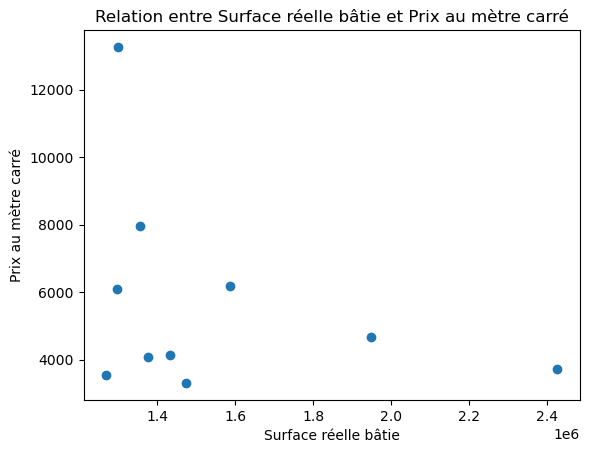

In [108]:
surface_par_departements = clean_data.groupby("Code departement")["Surface reelle bati"].sum().reset_index()
surface_par_departements = pd.merge(prix_metre_carre,surface_par_departements,on="Code departement")
surface_par_departements=surface_par_departements.sort_values(by="Surface reelle bati").tail(10)
plt.scatter(surface_par_departements['Surface reelle bati'], surface_par_departements['Prix metre carre'])
plt.title('Relation entre Surface réelle bâtie et Prix au mètre carré')
plt.xlabel('Surface réelle bâtie')
plt.ylabel('Prix au mètre carré')
plt.show()

Plus la sruface est grande, plus le prix au mètre carre est faible. C'est inversement proportionelle

##Prix au mètre carre à Paris au court du temps

In [118]:
ventes_paris_par_dates = ventes_paris
ventes_totales_par_dates["Date mutation"] = pd.to_datetime(clean_data["Date mutation"], format='%d/%m/%Y')
ventes_paris_par_dates["Prix metre carre"] = ventes_paris_par_dates["Valeur fonciere"] / ventes_paris_par_dates["Surface reelle bati"]
ventes_paris_par_dates = ventes_paris_par_dates.groupby("Date mutation")["Prix metre carre"].size().reset_index()
fig = px.line(ventes_paris_par_dates, x='Date mutation', y="Prix metre carre")
fig.show()

C:\Users\Nizar\AppData\Local\Temp\ipykernel_20008\3235755695.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Ici, on peut voir que comme pour les visuels ci_dessus, il y a une sorte -

In [120]:
clean_data.columns

Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')